In [428]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import math
import plotly.express as px
import plotly.graph_objects as go

from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from IPython.display import Image
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL

The two datasets are a comprehensive list of movies available on various major streaming platforms such as Netflix, Hulu, Prime Video, and Disney+

In [429]:
df_movies=pd.read_csv('MoviesOnStreamingPlatforms.csv')
df_tv =pd.read_csv('tv_shows.csv')

In [430]:
df_movies.head()

,Unnamed: 0,ID,Title,Year,Age,Rotten_Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


In [431]:
df_movies = df_movies.drop(['Unnamed: 0','ID'], axis = 1) 
df_movies.head()

,Title,Year,Age,Rotten_Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,The Irishman,2019,18+,98/100,1,0,0,0,0
1,Dangal,2016,7+,97/100,1,0,0,0,0
2,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,Roma,2018,18+,94/100,1,0,0,0,0


In [432]:
df_tv.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten_Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [433]:
df_tv = df_tv.drop(['Unnamed: 0', 'ID'], axis = 1) 
df_tv.head()

,Title,Year,Age,IMDb,Rotten_Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [434]:
custom_colors = ["#c61a09","#1ce783","#00A8E1","#7e38b7"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

##This is importing custom color palettes for each of the streaming services

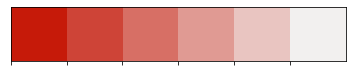

In [435]:
netflix_p = sns.light_palette(custom_colors[0], reverse=True)
sns.palplot(sns.color_palette(netflix_p),size=1)

##This is color I set for everything relating to Netflix.

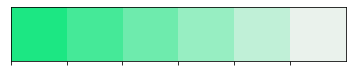

In [436]:
hulu_p = sns.light_palette(custom_colors[1], reverse=True)
sns.palplot(sns.color_palette(hulu_p),size=1)

##This is color I set for everything relating to Hulu.

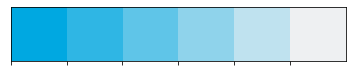

In [437]:
prime_p = sns.light_palette(custom_colors[2], reverse=True)
sns.palplot(sns.color_palette(prime_p),size=1)

##This is color I set for everything relating to Prime.

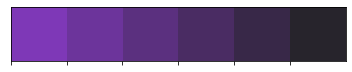

In [438]:
disney_p = sns.dark_palette(custom_colors[3], reverse=True)
sns.palplot(sns.color_palette(disney_p),size=1)

##This is color I set for everything relating to Disney+.

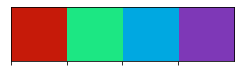

In [439]:
sns.palplot(sns.color_palette(custom_colors),size=1)

##This is combining the begining colors together to be referred back to.

# 1. In the Tv data find how many values there are with an Rotten Tomatoes score of 80 as well as print the name for each value.

In [440]:
jynx = df_tv[ df_tv.Rotten_Tomatoes.str.contains("80/100")].Title
jynx

103                               Lost in Space
104                  Star Trek: Deep Space Nine
105                             Jane the Virgin
106                                     Godless
107                                      The OA
108                    DC's Legends of Tomorrow
109                                Sacred Games
110                                     iZombie
111                                    Longmire
112                               Happy Endings
113                           Into the Badlands
114                               The Originals
115                              Anne with an E
116                           Grace and Frankie
117              Chilling Adventures of Sabrina
2018                                The Orville
2019                                   Preacher
2020                                 12 Monkeys
2021    Dirk Gently's Holistic Detective Agency
2022                                 Smallville
2023                         RuPaul's Dr

In [441]:
gizmo = df_tv[ df_tv.Rotten_Tomatoes.str.contains("90/100")].Title
gizmo

10                             Mindhunter
11                              Community
12                                 Narcos
13                              Shameless
14                            Money Heist
15                     Marvel's Daredevil
16                                Lucifer
1958    It's Always Sunny in Philadelphia
1959                              Firefly
1960                     My Hero Academia
1961                How I Met Your Mother
1962                        Modern Family
1963                  The Handmaid's Tale
3450                          The Expanse
Name: Title, dtype: object

This is not suprising as there are many tv shows that to most people are very above average and then there are some shows that people love and will rank higher in personal preference.

# 2. How many unique values are there in the Rotten_Tomatoes category per dataset?


In [442]:
len(df_movies['Rotten_Tomatoes'].unique())

86

In [443]:
len(df_tv['Rotten_Tomatoes'].unique())

85

# 3. How many unique values are their from each streaming platform from each set?

In [444]:
val_counts = []
dfs = [df_movies,df_tv]
cols = ['Netflix','Hulu','Prime Video','Disney+']

for x in dfs:
    for y in cols:
        val_counts.append(val_sum(x,y))
val_counts

[3695, 1047, 4113, 922, 1971, 1621, 1831, 351]

# 4. Convert the Rotten_Tomatoes columns into a string.

In [445]:
df_movies['Rotten_Tomatoes'] = df_movies['Rotten_Tomatoes'].str.split('/').str[0]
df_tv['Rotten_Tomatoes'] = df_tv['Rotten_Tomatoes'].str.split('/').str[0]

Now that this is done(which it took me a while to figure out) we are now able to pull information from that column that will show a few interestings 

# 5. Find the min of the Rotten_Tomatoes score per year and on each streaming platform.

In [446]:
nala = df_movies.groupby(['Rotten_Tomatoes', 'Title', 'Year'])[['Netflix', 'Prime Video', 'Hulu', 'Disney+']].min()
nala.head(20)

Netflix  \
Rotten_Tomatoes Title                                              Year            
10              Alakada Reloaded                                   2017        1   
                ChuChuTV Bedtime Stories & Moral Stories for Ki... 2019        1   
                ChuChuTV Surprise Eggs Learning Videos (English)   2019        1   
                Cop Watchers                                       2016        1   
                Dear Affy                                          2020        1   
                Falz Experience                                    2018        1   
                Hunt for the Abominable Snowman                    2011        0   
                Jandino: Whatever it Takes                         2016        1   
                Lock Your Girls In                                 1982        1   
                Mariusz Kałamaga, Karol Kopiec, Wiolka Walaszcz... 2016        1   
                Monty Python Conquers America                      2000        1   
                The Last Bomb of the Second World War              2019        1   
                Thomas & Friends: Marvelous Machinery: A New Ar... 2020        1   
                Women of Impact: Changing the World                2019        0   
                You're Everything To Me                            2016        1   
12              5K1-States Evidence                                2018        0   
                Chhota Bheem Ka Roosi Romanch                      2019        1   
                ChuChuTV Surprise Eggs Learning Videos (Hindi)     2019        1   
                Comrades & Cash: How Money Found Its Way Throug... 2014        0   
                Diamonds In The Sky                                2018        1   

                                                                         Prime Video  \
Rotten_Tomatoes Title                                              Year                
10              Alakada Reloaded                                   2017            0   
                ChuChuTV Bedtime Stories & Moral Stories for Ki... 2019            0   
                ChuChuTV Surprise Eggs Learning Videos (English)   2019            0   
                Cop Watchers                                       2016            0   
                Dear Affy                                          2020            0   
                Falz Experience                                    2018            0   
                Hunt for the Abominable Snowman                    2011            0   
                Jandino: Whatever it Takes                         2016            0   
                Lock Your Girls In                                 1982            0   
                Mariusz Kałamaga, Karol Kopiec, Wiolka Walaszcz... 2016            0   
                Monty Python Conquers America                      2000            0   
                The Last Bomb of the Second World War              2019            0   
                Thomas & Friends: Marvelous Machinery: A New Ar... 2020            0   
                Women of Impact: Changing the World                2019            0   
                You're Everything To Me                            2016            0   
12              5K1-States Evidence                                2018            1   
                Chhota Bheem Ka Roosi Romanch                      2019            0   
                ChuChuTV Surprise Eggs Learning Videos (Hindi)     2019            0   
                Comrades & Cash: How Money Found Its Way Throug... 2014            0   
                Diamonds In The Sky                                2018            0   

                                                                         Hulu  \
Rotten_Tomatoes Title                                              Year         
10              Alakada Reloaded                                   2017     0   
                ChuChuTV Bedtime Stories & M

# 6. Find the max of the Rotten_Tomatoes score per year and on each streaming platform.

In [458]:
tex = df_movies.groupby(['Rotten_Tomatoes', 'Title', 'Year'])[['Netflix', 'Prime Video', 'Hulu', 'Disney+']].max()
tex

Netflix  \
Rotten_Tomatoes Title                                              Year            
10              Alakada Reloaded                                   2017        1   
                ChuChuTV Bedtime Stories & Moral Stories for Ki... 2019        1   
                ChuChuTV Surprise Eggs Learning Videos (English)   2019        1   
                Cop Watchers                                       2016        1   
                Dear Affy                                          2020        1   
...                                                                          ...   
94              To All the Boys I've Loved Before                  2018        1   
95              David Attenborough: A Life on Our Planet           2020        1   
96              Mary Poppins                                       1964        0   
97              Dangal                                             2016        1   
98              The Irishman                                       2019        1   

                                                                         Prime Video  \
Rotten_Tomatoes Title                                              Year                
10              Alakada Reloaded                                   2017            0   
                ChuChuTV Bedtime Stories & Moral Stories for Ki... 2019            0   
                ChuChuTV Surprise Eggs Learning Videos (English)   2019            0   
                Cop Watchers                                       2016            0   
                Dear Affy                                          2020            0   
...                                                                              ...   
94              To All the Boys I've Loved Before                  2018            0   
95              David Attenborough: A Life on Our Planet           2020            0   
96              Mary Poppins                                       1964            0   
97              Dangal                                             2016            0   
98              The Irishman                                       2019            0   

                                                                         Hulu  \
Rotten_Tomatoes Title                                              Year         
10              Alakada Reloaded                                   2017     0   
                ChuChuTV Bedtime Stories & Moral Stories for Ki... 2019     0   
                ChuChuTV Surprise Eggs Learning Videos (English)   2019     0   
                Cop Watchers                                       2016     0   
                Dear Affy                                          2020     0   
...                                                                       ...   
94              To All the Boys I've Loved Before                  2018     0   
95              David Attenborough: A Life on Our Planet           2020     0   
96              Mary Poppins                                       1964     0   
97              Dangal                                             2016     0   
98              The Irishman                                       2019     0   

                                                                         Disney+  
Rotten_Tomatoes Title                                              Year           
10              Alakada Reloaded                                   2017        0  
                ChuChuTV Bedtime Stories & Moral Stories for Ki... 2019        0  
                ChuChuTV Surprise Eggs Learning Videos (English)   2019        0  
                Cop Watchers                                       2016        0  
                Dear Affy                                          2020        0  
...                                                                          ...  
94              To All the Boys I've Loved Before                  2018        0  
95              David Attenborough

# 7. For the years after 2000 plot the number of movies released.

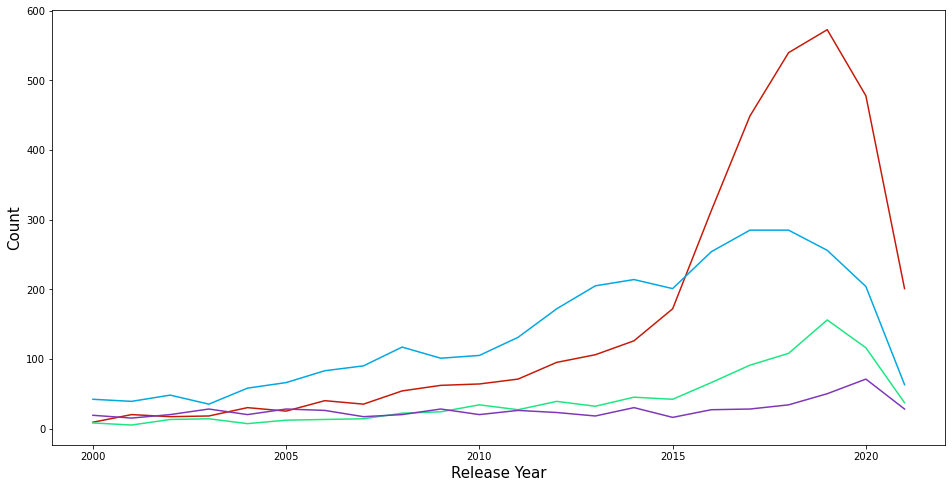

In [447]:
post_2000 = df_movies[df_movies.Year >= 2000]
year_movies = post_2000.groupby('Year')[['Netflix','Hulu','Prime Video','Disney+']].sum()

plt.figure(figsize = (16, 8))
sns.lineplot(x=year_movies.index,y=year_movies['Netflix'])
sns.lineplot(x=year_movies.index,y=year_movies['Hulu'])
sns.lineplot(x=year_movies.index,y=year_movies['Prime Video'])
sns.lineplot(x=year_movies.index,y=year_movies['Disney+'])
plt.xlabel('Release Year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

# 8. Plot the average of each Age "limit" on the movies on each platform using a bar chart(This could help parents be informed on what their children are watching)

In [448]:
df_m = df_movies.copy()
df_m = df_m[df_m['Age'].notna()]

In [449]:
df_m['Age']=df_m['Age'].str.replace('+','')
df_m['Age']=df_m['Age'].str.replace('all','0')
df_m['Age']=df_m['Age'].astype(str).astype(int)

/var/folders/lq/hy33gg5d3f7bk0mn831j4vb40000gn/T/ipykernel_60861/3143319270.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [450]:
df_m['Age'].mean()

12.361933308355189

In [451]:
def barplot(i,dataframe,platform,p):
    plt.subplot(i)
    dataframe=dataframe.loc[dataframe[platform] == 1]
    dataframe = dataframe['Age'].value_counts().reset_index()
    dataframe.columns=['age','count']
    sns.barplot(x="age", y="count", data=dataframe,palette=p)
    plt.xlabel('Age', fontsize = 15)
    plt.ylabel(platform, fontsize = 15)

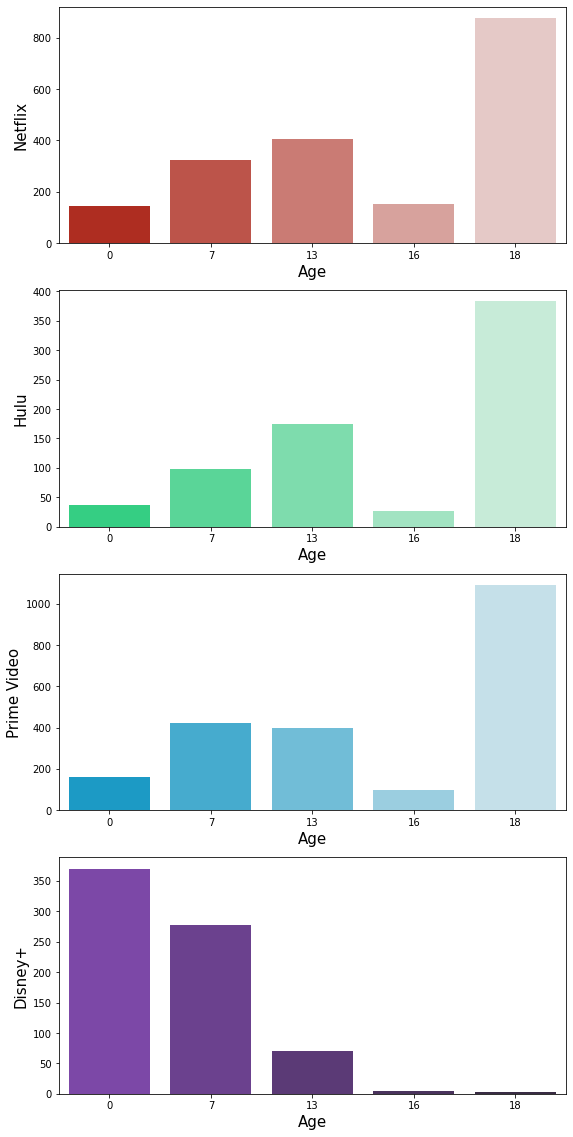

In [452]:
plt.figure(figsize = (20, 20))

barplot(421,df_m,'Netflix',netflix_p)
barplot(423,df_m,'Hulu',hulu_p)
barplot(425,df_m,'Prime Video',prime_p)
barplot(427,df_m,'Disney+',disney_p)

# 9. Using a pie char plot the percentages of the Streaming services from each dataset.

In [453]:
def donut(i,df,sizes,title):
    plt.subplot(i)
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                autopct='%0.2f%%', shadow=False)

    centre_circle = plt.Circle((0,0),0.4,color='black', fc='white',linewidth=1.25)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(title)
    plt.axis('equal')


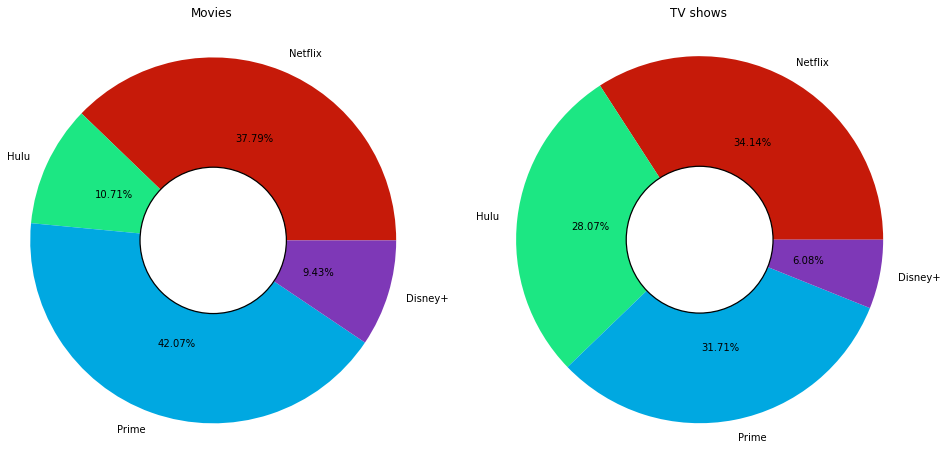

In [454]:
fig = plt.subplots(figsize=(16, 8))
labels = 'Netflix', 'Hulu','Prime','Disney+'
sizes1 = [val_counts[0], val_counts[1],val_counts[2],val_counts[3]]
sizes2 = [val_counts[4], val_counts[5],val_counts[6],val_counts[7]]
colors = custom_colors
explode = (0, 0, 0, 0) 

donut(121,df_movies,sizes1,'Movies')
donut(122,df_tv,sizes2,'TV shows')
plt.show()

In [455]:
m_year = splitting(df_movies,'Year')

NameError: name 'splitting' is not defined

In [ ]:
df_l_merged = pd.concat([df_movies, ], axis = 1, sort = False)
df_g_merged = pd.concat([df_movies, m_year], axis = 1, sort = False)

def bar(dataframe,platform,c):
    dataframe=dataframe.loc[dataframe[platform] == 1]
    val_counts = dataframe.iloc[:,15:].sum(axis=0).sort_values(ascending=False)
    val_counts2 = pd.DataFrame(val_counts,columns=['Number of movies'])
    return val_counts2[0:20].style.bar(subset=["Number of movies",], color=c)

In [ ]:
bar(df_l_merged,'Netflix','#ff6b6b')

NameError: name 'df_l_merged' is not defined

In [ ]:
r = df_tv.sort_values(by='IMDb', ascending=False)
r = r[0:20]
r = r[['Title','IMDb','Netflix','Hulu','Prime Video','Disney+']]
r['IMDb'] = r['IMDb'].astype(float)

ValueError: could not convert string to float: '9.6/10'

In [ ]:
r.style.bar(subset=["Netflix"], color='#ff6b6b')\
.bar(subset=["Hulu"], color='#95d5b2')\
.bar(subset=["Prime Video"], color='#a2d2ff')\
.bar(subset=["Disney+"], color='#72efdd')\
.bar(subset=["IMDb"], color='#').background_gradient(cmap='Purples')

TypeError: '>=' not supported between instances of 'str' and 'int'